# **🧹 Data cleaning & Preprocessing with Pandas**

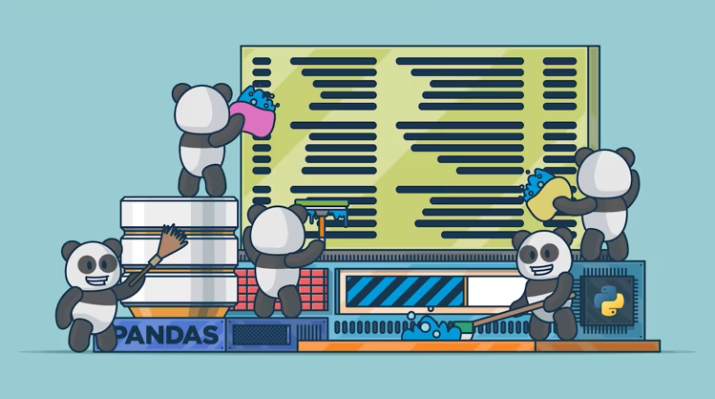

## **0. 📋 Today’s plan**


**What we are going to do today?**

---

⬜ Reinforce the concept of data cleaning and its significance

⬜ Get familiar with the 6 Key steps of Data Cleaning and Preparation
* Data Profiling
* Fixing data types
* Checking consistency
* Handling Missing Values
* Removing Duplicates
* Outlier Detection and Handling

⬜ Learn how to perform data profiling and how to interpret retrieved insights about your data structure

⬜ Learn how to fix data types using Pandas

⬜ Learn how to check and fix consistency of non-numeric data

⬜ Get familiar with different approaches to handle missing values

⬜ Learn how to remove duplicates

⬜ Reinforce what are outliers and learn how to detect and filter them


## **1. 🎯 What is data cleaning & preprocessing for?**

We already discussed this a couple of times (in the Excel module as well as in the Power BI module), but this process is significant enough to talk about this more and more!


**👉 THE ISSUE**

Raw data collected from various sources is often messy and contains errors, inconsistencies, missing values, and outliers.

Data cleaning and preprocessing both **aim to find and fix these issues** to ensure accurate, reliable, and meaningful results during data analysis, as wrong conclusions could be costly.

**👉 HOW IMPORTANT IS IT?**

>❝ Data scientists, according to interviews and expert estimates, spend 50 percent to 80 percent of their time mired in the mundane labor of collecting and preparing unruly digital data, before it can be explored for useful nuggets. ❞
>
> 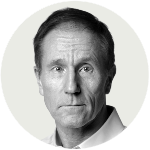
>
> ***Steve Lohr, The New York Times***

As we can see from this statement, data we use for analysis needs to be:
* complete
* accurate
* unbiased
* reliable.

The quality of your data is crucial for the success of your analysis. As the saying goes, **“garbage in, garbage out.”**

The quality and reliability of your analysis depend heavily on the quality of your data.

**👉 CONCLUSION**

Data cleaning and preparation are foundational steps that ensure the data's reliability, accuracy, and usability. Without thorough cleaning and preparation, any analysis, no matter how sophisticated, risks being compromised by the quality of the underlying data.

## **2. 📋 Checklist: 6 Key Steps in Data Cleaning and Preparation**

⬜ **1. Data Profiling:** Understanding the structure, quality, and characteristics of the data.

⬜ **2. Fixing data types:** Changing types of columns to the most suitable one.

⬜ **3. Checking consistency:** checking if the values have the same units and format. As well as checking whether equal values written the same (for example having both of "male" and "M" is an issue with consistency)

⬜ **4. Handling Missing Values:** Filling in, deleting, or otherwise managing missing data points.

⬜ **5. Removing Duplicates:** Identifying and eliminating duplicate records to avoid redundancy.

⬜ **6. Outlier Detection and Handling:** Identifying and addressing outliers that can skew analysis results.

## **3. 🐼 Data Cleaning With Pandas**

### **1️⃣ Data Profiling**

Data profiling is a crucial initial step in the data preparation process. It involves examining the raw data to understand its structure, content, quality, and relationships.

This step helps in identifying potential issues and understanding the characteristics of the data before performing any detailed analysis.

#### **Display the first few rows of the dataset**

In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/example_dataset.csv')

df.head()

,Name,Age,Gender,Salary,Joining_Date,City
0,Andrea Garcia,64.0,Other,NaN,2021-11-23,North Alexandria
1,Ryan Sandoval,28.0,NaN,50883.76,NaN,East Paigeton
2,Stephen Sherman,36.0,Male,32762.15,2020-05-27,Herringchester
3,Maria Scott,NaN,Female,71278.72,2021-11-29,New James
4,Charles King,40.0,Male,NaN,NaN,Schwartzhaven


Even now we already can find the missing values in the following columns:

1. **Age:** One missing value. You might consider imputation strategies based on other related columns or overall distribution.
2. **Gender:** One missing value. You may need to determine how to handle non-standard and missing entries.
3. **Salary:** Two missing values. Consider if salary can be estimated based on other factors like age, gender, or city.
4. **Joining_Date:** Two missing values. These could be crucial for time-based analyses; consider how to handle them (e.g., imputing based on other available information or leaving them out of time-based analyses).

#### **Display basic information about the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          95 non-null     object 
 1   Age           73 non-null     float64
 2   Gender        85 non-null     object 
 3   Salary        76 non-null     float64
 4   Joining_Date  53 non-null     object 
 5   City          105 non-null    object 
dtypes: float64(2), object(4)
memory usage: 5.0+ KB


Now we can find that **almost all of the columns contain missing values**:

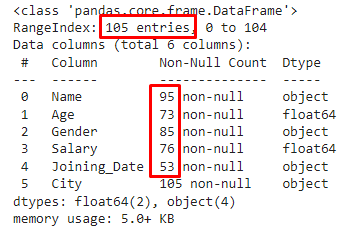

Also we can conclude the following:
* columns like `Age`, `Salary`, and `Joining_Date` have a significant number of missing values that need to be addressed to avoid biases and inaccuracies in analysis.
* The `Joining_Date` column should be converted from object to datetime for proper temporal analysis.


#### **Summary Statistics for Numerical Columns**

In [ ]:
df.describe()

,Age,Salary
count,73.000000,76.000000
mean,37.972603,70766.697500
std,11.904682,24050.905802
min,18.000000,30057.980000
25%,30.000000,50743.080000
50%,37.000000,71144.195000
75%,46.000000,88121.122500
max,64.000000,118382.310000


Now we have a summary information that we can use for future imputations.

It's also a good practice to take a look at the descriptive statistics to evaluate is data looks correct or not.

For example we see that the min age is 18 and max age is 64. It looks like a valid data.\
But if we had the max age more than 100 (for example), we would've needed to consider this as a wrong input.

#### **Summary Statistics for Non-Numeric Columns**

> **💡 Take a note!**
>
> We did not do this before, but it's useful feature. Please remember it and use in the future

In [ ]:
df.describe(include=['O'])

,Name,Gender,Joining_Date,City
count,95,85,53,105
unique,90,5,52,99
top,Douglas Baker,Female,2020-05-27,Herringchester
freq,2,24,2,2


**Possible observations:**

* There are few duplicates in the Name column (e.g., "Douglas Baker" appears twice). Depending on the context, you might need to investigate if these are indeed the same individuals or different people with the same name.
* There is something weird in the Gender column as there are 5 unique values.  Ensure that the values are consistent (e.g., "Male," "Female," "Other") and correct any variations or misspellings.

#### **Number of Missing values & Duplicate Rows**

You are also able to calculate missing values and duplicates directly:

In [ ]:
# Number of Duplicate Rows
df.duplicated().sum()

4

In [ ]:
# Number of missing values
df.isnull().sum()

Name            10
Age             32
Gender          20
Salary          29
Joining_Date    52
City             0
dtype: int64

### **2️⃣ Fixing data types**

#### **The problem**

As you can see, all our data became either `float64` type or `object` types

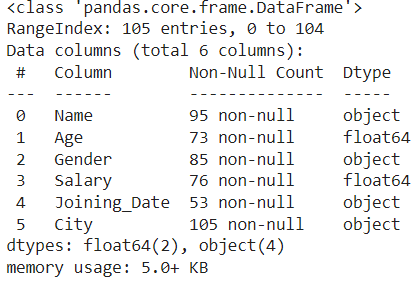

**What is the `object` dtype?**

There are object dtype columns, which can hold any Python object

Pandas will use this type as default when it can't clearly convert your data to a particular one

Before performing any other changes we need to fix this.

#### **The most used data types in Pandas**

List of the most used dtypes:

<table>
<tr><th style="text-align: center;">Kind of Data</th><th style="text-align: center;">String Aliases</th><th></th></tr>
<tr><td style="text-align: center;">Integer</td><td style="text-align: center;">int64</td><td></td></tr>
<tr><td style="text-align: center;">Float</td><td style="text-align: center;">float64</td><td></td></tr>
<tr><td style="text-align: center;">Strings</td><td style="text-align: center;">string</td><td></td></tr>
<tr><td style="text-align: center;">Boolean</td><td style="text-align: center;">boolean</td><td></td></tr>
<tr><td style="text-align: center;">Date and Time</td><td style="text-align: center;">datetime64</td><td></td></tr>

</table>

> **💡 Take a note...**
>
> You can find all the dtypes and their explanation by the following link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

More generically speaking **you'll usually divide your data into 3 categories**:
1. number
2. date and/or time
3. string


#### **Which columns need to be fixed and how?**

In our current case we need to convert the following columns:

1. **Age** → `int64`
2. **Name**, **Gender**, **City** → `string`
3. **Joining_Date** → `datetime`

#### **Let's fix it!**

In [ ]:
# Manual fix : pick one column and fix type

df['Age'] = df['Age'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

Oof, and we run into some error right away

Let's look at it closely and understand what went wrong

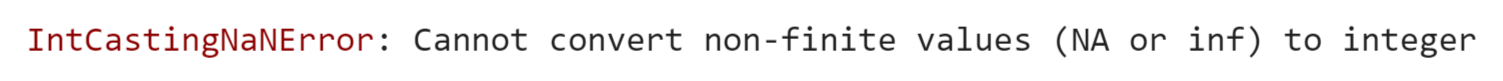

It looks like we need to fix the missing values first!

We'll do that later! For now, let's continue to other columns!

#### Let's continue with string columns

In [ ]:
# fixing a lot of columns at the same time, but still using manual input

str_columns = ['Name', 'City']
df[str_columns] = df[str_columns].astype('string')

In [ ]:
df[str_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    95 non-null     string
 1   City    105 non-null    string
dtypes: string(2)
memory usage: 1.8 KB


> **💡 Pay attention!**
>
> Now we also will cover another additional dtype: `category`.\
> Let's find out what is it.

We left out `Gender` column on purpose to show you another pandas dtype called `category`!

This dtype is used for string variables consisting of only a few different values. \
Converting such a string variable to a categorical variable will:
* save memory
* signal to other Python libraries that this column should be treated as a categorical variable

So let's convert `Gender` column into `category` dtype!

In [ ]:
df['Gender'] = df['Gender'].astype('category')

In [ ]:
df['Gender']

0       Other
1         NaN
2        Male
3      Female
4        Male
        ...  
100      Male
101    Female
102       NaN
103      male
104     Other
Name: Gender, Length: 105, dtype: category
Categories (5, object): ['Female', 'Male', 'Other', 'female', 'male']

Now you can find the list of existing categories:

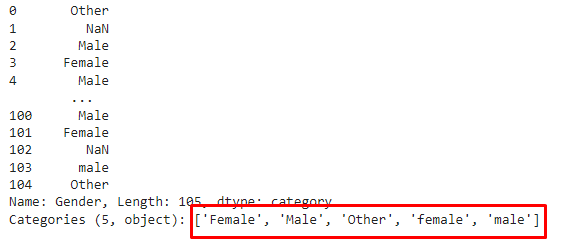

#### **Fixing dates**

Converting to datetime using the `.to_datetime()` method is generally preferred over using `astype()` because `.to_datetime()` provides more robust and flexible handling of date and time data.

Here are some key reasons:

**1. Error Handling:** `.to_datetime()` offers better error handling and can raise or ignore errors based on parameters like `errors='coerce'`, which converts invalid parsing to `NaT` (Not a Time), making it easier to clean data.

**2. Flexibility:** `.to_datetime()` can handle a variety of input types, including strings, integers, and even lists or Series of datetime-like objects. It can convert these inputs into datetime objects efficiently.

**3. Performance:** `.to_datetime()` is optimized for performance and can handle large datasets more efficiently compared to `astype()`, especially when dealing with complex date parsing.

In [ ]:
df['Joining_Date'] = pd.to_datetime(df['Joining_Date'], errors='coerce')

> **💡 Pay attention!**
>
> The `errors='coerce'` parameter helps you to operate wrong dates and empty cells changing them to NaT (No a Time)

Let's check a result:

In [ ]:
df.head()

,Name,Age,Gender,Salary,Joining_Date,City,Joining_Date_format
0,Andrea Garcia,64.0,Other,NaN,2021-11-23,North Alexandria,2021-11-23
1,Ryan Sandoval,28.0,NaN,50883.76,NaT,East Paigeton,NaT
2,Stephen Sherman,36.0,Male,32762.15,2020-05-27,Herringchester,2020-05-27
3,Maria Scott,NaN,Female,71278.72,2021-11-29,New James,2021-11-29
4,Charles King,40.0,Male,NaN,NaT,Schwartzhaven,NaT


If your data is stored in some unusual format, you can directly tell pandas about it and help it understand your dates using the parameter `format="..."`

In [ ]:
df['Joining_Date'] = pd.to_datetime(df['Joining_Date'], format="%Y-%m-%d", errors='coerce')
df.head()

,Name,Age,Gender,Salary,Joining_Date,City,Joining_Date_format
0,Andrea Garcia,64.0,Other,NaN,2021-11-23,North Alexandria,2021-11-23
1,Ryan Sandoval,28.0,NaN,50883.76,NaT,East Paigeton,NaT
2,Stephen Sherman,36.0,Male,32762.15,2020-05-27,Herringchester,2020-05-27
3,Maria Scott,NaN,Female,71278.72,2021-11-29,New James,2021-11-29
4,Charles King,40.0,Male,NaN,NaT,Schwartzhaven,NaT


Used formats:

| **Directive** | **Meaning**                                       | **Example**                              |
|---------------|---------------------------------------------------|------------------------------------------|
| %Y            | Year with century as a decimal number.            | 0001, 0002, …, 2013, 2014, …, 9998, 9999 |
| %m            | Month as a zero-padded decimal number.            | 01, 02, …, 12                            |
| %d            | Day of the month as a zero-padded decimal number. | 01, 02, …, 31                            |




To read more about format strings for date parsing, you can go here: [strftime() and strptime() Format Codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior:~:text=The%20following%20is%20a%20list%20of%20all%20the%20format%20codes%20that%20the%201989%20C%20standard%20requires%2C%20and%20these%20work%20on%20all%20platforms%20with%20a%20standard%20C%20implementation.)

### **3️⃣ Checking consistency (categorical/string data)**

Let's look at unique values for `Gender` column

In [ ]:
df['Gender'].unique()

['Other', NaN, 'Male', 'Female', 'male', 'female']
Categories (5, object): ['Female', 'Male', 'Other', 'female', 'male']

Sometimes when data can be inputted manualy, inconcistencies like this can happen\
So it's important to always check for it and fix it
With strings the easiest way is use either `lower` or `upper` methods

In [ ]:
df['Gender'] = df['Gender'].str.lower()
df['Gender'].unique()

array(['other', nan, 'male', 'female'], dtype=object)

---

## **🏋️‍♀️ Self-practice time!**

Take a quiz **"Data cleaning pt. 1"** in LMS.

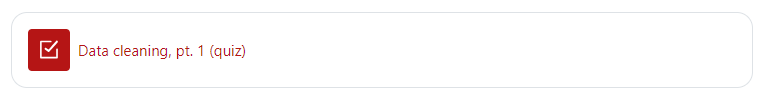

---

### **4️⃣ Handling missing values**

#### **Introduction**

There are **two ways** of handling missing values:
1. **Removing rows** with missings
2. **Filling** missings
  * with calculated value
  * with some constant value




#### **Handling missings in Numeric columns**

For numeric columns data is usually filled with one of the measures of central tendency
* mean
* mode
* median

Let's fill missings in **Age** column with average age\
This is done using method `fillna`.

In [ ]:
age_mean = df['Age'].mean()
df['Age'] = df['Age'].fillna(age_mean)
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 105 entries, 0 to 104
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
105 non-null    float64
dtypes: float64(1)
memory usage: 968.0 bytes


Notice how now it says `105 non-null` instead of `73 non-null` from before

> **💡 Take a note!**
>
> The method .fillna() is used to fill missing values with the given value.

Let's do the same with **Salary** column but fill the it with median this time\
Salaries are often very different and median salary will showcase it the best

In [ ]:
salary_median = df['Salary'].median()
df['Salary'] = df['Salary'].fillna(salary_median)
df['Salary'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 105 entries, 0 to 104
Series name: Salary
Non-Null Count  Dtype  
--------------  -----  
105 non-null    float64
dtypes: float64(1)
memory usage: 968.0 bytes


##### **👉 BTW, now we can fix data type from float64 to int64!**

In [ ]:
df['Age'] = df['Age'].astype('int64')

In [ ]:
df['Age'].sample(5)

3      37
78     35
104    37
95     52
81     49
Name: Age, dtype: int64

#### **Object/string columns**

For object/string/categorical columns data is usually filled with:
* mode\
or
* some particular value (like `missing` or `unknown` or just empty string)

For `Gender` column let's fill missings with mode

In [ ]:
gender_mode = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(gender_mode).astype('category')
df['Gender'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 105 entries, 0 to 104
Series name: Gender
Non-Null Count  Dtype   
--------------  -----   
105 non-null    category
dtypes: category(1)
memory usage: 437.0 bytes


And for `City` let's fill it with **Unknown**

In [ ]:
city_value = 'Unknown'
df['City'] = df['City'].fillna(city_value)
df['City'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 105 entries, 0 to 104
Series name: City
Non-Null Count  Dtype 
--------------  ----- 
105 non-null    string
dtypes: string(1)
memory usage: 968.0 bytes


And for `Name` let's do the other way of handling missings: let's drop all rows, where `Name` is empty

In [ ]:
df = df.dropna(subset=['Name'])

> **💡 Take a note!**
>
> The method `.dropna()` is used to drop rows with missing values in the given column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 0 to 104
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          95 non-null     string        
 1   Age           95 non-null     int64         
 2   Gender        95 non-null     category      
 3   Salary        95 non-null     float64       
 4   Joining_Date  49 non-null     datetime64[ns]
 5   City          95 non-null     string        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), string(2)
memory usage: 4.7 KB


As you can see, we have 95 entries left after `dropna`.

#### **Date columns**

For date columns data is usually filled with:
* some particular value
  * the first or last date in the dataset
  * placeholder date that is not present in dataset (to understand later that this date was actually missing)
* forward/backward fill (aka value from previous/following row)
  * usually used with time series

Let's fill `Joining Date` with first date from dataset

In [ ]:
min_date = df['Joining_Date'].min()
df['Joining_Date'] = df['Joining_Date'].fillna(min_date)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 0 to 104
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          95 non-null     string        
 1   Age           95 non-null     int64         
 2   Gender        95 non-null     category      
 3   Salary        95 non-null     float64       
 4   Joining_Date  95 non-null     datetime64[ns]
 5   City          95 non-null     string        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), string(2)
memory usage: 4.7 KB


### **5️⃣ Removing duplicates**

For this we will use method `drop_duplicates`

In [ ]:
# uncomment code bellow to see full docs for `drop_duplicates`
# df.drop_duplicates

Parameters of `drop_duplicates`\
`subset`: column label or sequence of labels, optional
>Only consider certain columns for identifying duplicates, by default use all of the columns.

`keep`: {`'first'`, `'last'`, `False`}, default: **'first'**
>Determines which duplicates (if any) to keep.\
    - `'first'` : Drop duplicates except for the first occurrence.\
    - `'last'` : Drop duplicates except for the last occurrence.\
    - `False` : Drop all duplicates.

`inplace`: `bool`, default: **False**
> Whether to modify the DataFrame rather than creating a new one.

`ignore_index`: bool, default: **False**
> If ``True``, the resulting axis will be labeled `0, 1, …, n - 1`. It's better to set it as `True`. Because otherwise you'll face with inconsistent indices after dropping rows (e.g. `0, 1, 4, 8, 9, 10, ...`)


**For now let's do the following:**
* Use all columns for checking for duplicates
* Keep first instance
* Ignore index

In [ ]:
df = df.drop_duplicates(keep='first', ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          91 non-null     string        
 1   Age           69 non-null     float64       
 2   Gender        81 non-null     object        
 3   Salary        72 non-null     float64       
 4   Joining_Date  52 non-null     datetime64[ns]
 5   City          101 non-null    string        
dtypes: datetime64[ns](1), float64(2), object(1), string(2)
memory usage: 4.9+ KB


Previously we had **95** entries left, now we have **91**!

### **6️⃣ Removing outliers**

Let's remove outliers for salary

> **💡Remember that**
>
> Usually the values are being considered as outliers in case thay lie out of the following range: \
> **From:** $Q_1 - 1.5 \cdot IQR$ ($Q_1$ is the 1st quartile) \
> **To:** $Q_3 + 1.5 \cdot IQR$ ($Q_3$ is the 3rd quartile) \

Let's detect them and filter them after.

In [ ]:
# Quartiles calcualtion
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)

# IQR calculation
IQR = Q3 - Q1

# Lower and Upper bounds for non-outliers calculating
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
cond1 = df['Salary'] >= lower_bound
cond2 = df['Salary'] <= upper_bound

df_clean = df[cond1 & cond2]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          91 non-null     string        
 1   Age           69 non-null     float64       
 2   Gender        81 non-null     object        
 3   Salary        72 non-null     float64       
 4   Joining_Date  52 non-null     datetime64[ns]
 5   City          101 non-null    string        
dtypes: datetime64[ns](1), float64(2), object(1), string(2)
memory usage: 4.9+ KB


Our `Salary` column had no outliers

## **🏋️‍♀️ Self-practice time!**

Take a quiz **"Data cleaning pt. 2"** in LMS.

## **📋 Today’s results**
**What we have done today?**

---

⬜ Reinforced the concept of data cleaning and its significance

⬜ Got familiar with the 6 Key steps of Data Cleaning and Preparation
* Data Profiling
* Fixing data types
* Checking consistency
* Handling Missing Values
* Removing Duplicates
* Outlier Detection and Handling

⬜ Learned how to perform data profiling and how to interpret retrieved insights about your data structure

⬜ Learned how to fix data types using Pandas

⬜ Learned how to check and fix consistency of non-numeric data

⬜ Got familiar with different approaches to handle missing values

⬜ Learned how to remove duplicates

⬜ Reinforced what are outliers and learned how to detect and filter them